**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Load dataset

In [6]:
data = pd.read_csv("student-por.csv")

Basic info

In [7]:
data.shape

(649, 33)

In [8]:
data.info


<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]>

In [9]:
data.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        4   0  11  11  
1    ...      5        3      3     1     1      3        2   9  11  11  
2    ...      4        3      2     2     3      3        6  12  13  12  
3    ...      3        2      2     1     1      5        0  14  14  14  
4    ...      4        3      2     1     2      5        0  11  13  13  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[649 rows x 33 columns]>

In [10]:
data.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


Preprocessing

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Copying the dataset to avoid changing the original
data_encoded = data.copy()

# Encoding all categorical (object type) columns
le = LabelEncoder()
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = le.fit_transform(data_encoded[col])

# Checking the first few rows after encoding
data_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


Data Visualization

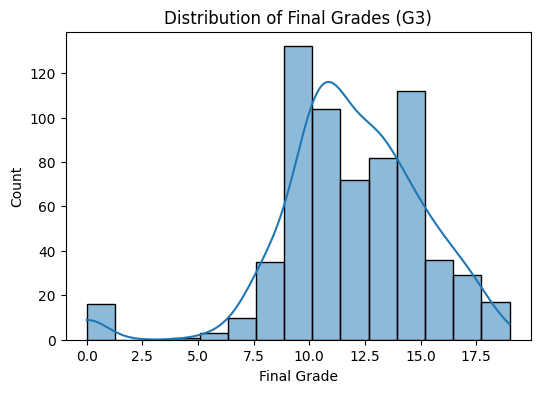

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the target variable (Final Grade - G3)
plt.figure(figsize=(6,4))
sns.histplot(data['G3'], kde=True, bins=15)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

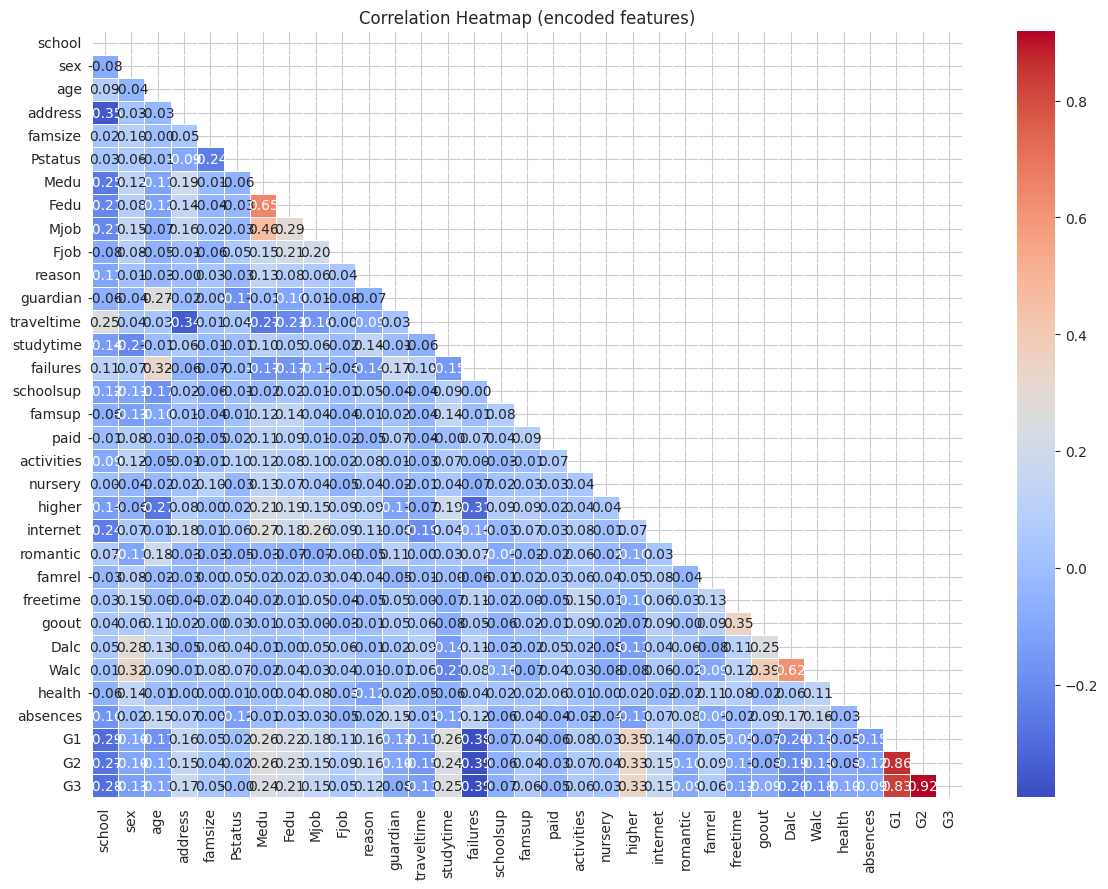

In [13]:
sns.set_style('whitegrid')

# 2. Correlation heatmap (using encoded data for categorical relationships)
plt.figure(figsize=(12,9))
corr = data_encoded.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (encoded features)')
plt.tight_layout()
plt.show()

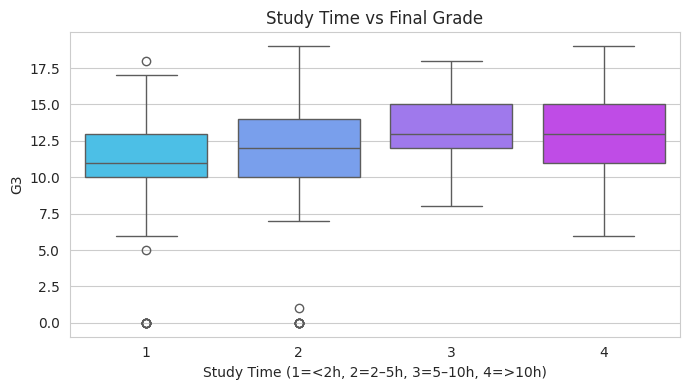

In [14]:
# 3. Study time vs final grade (boxplot)
plt.figure(figsize=(7,4))
sns.boxplot(x='studytime', y=col, data=data, palette='cool')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (1=<2h, 2=2–5h, 3=5–10h, 4=>10h)')
plt.ylabel(col)
plt.tight_layout()
plt.show()

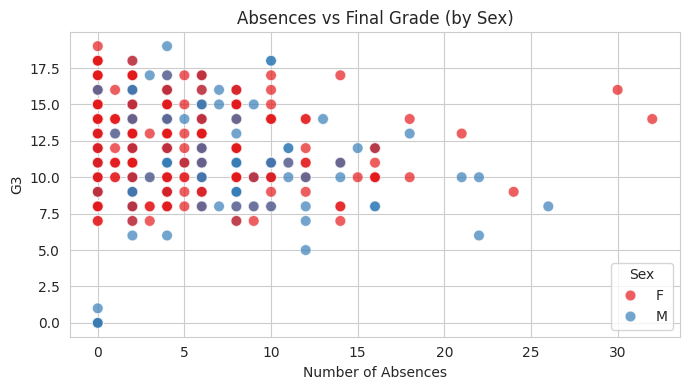

In [15]:
# 4. Absences vs final grade
plt.figure(figsize=(7,4))
sns.scatterplot(x='absences', y=col, hue='sex', data=data, palette='Set1', s=60, alpha=0.7)
plt.title('Absences vs Final Grade (by Sex)')
plt.xlabel('Number of Absences')
plt.ylabel(col)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

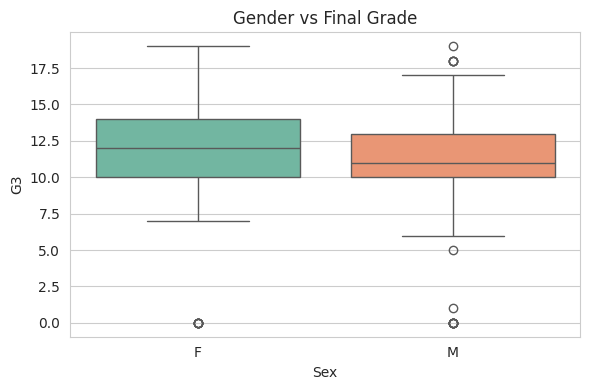

In [16]:
# 5. Gender-wise comparison (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y=col, data=data, palette='Set2')
plt.title('Gender vs Final Grade')
plt.xlabel('Sex')
plt.ylabel(col)
plt.tight_layout()
plt.show()

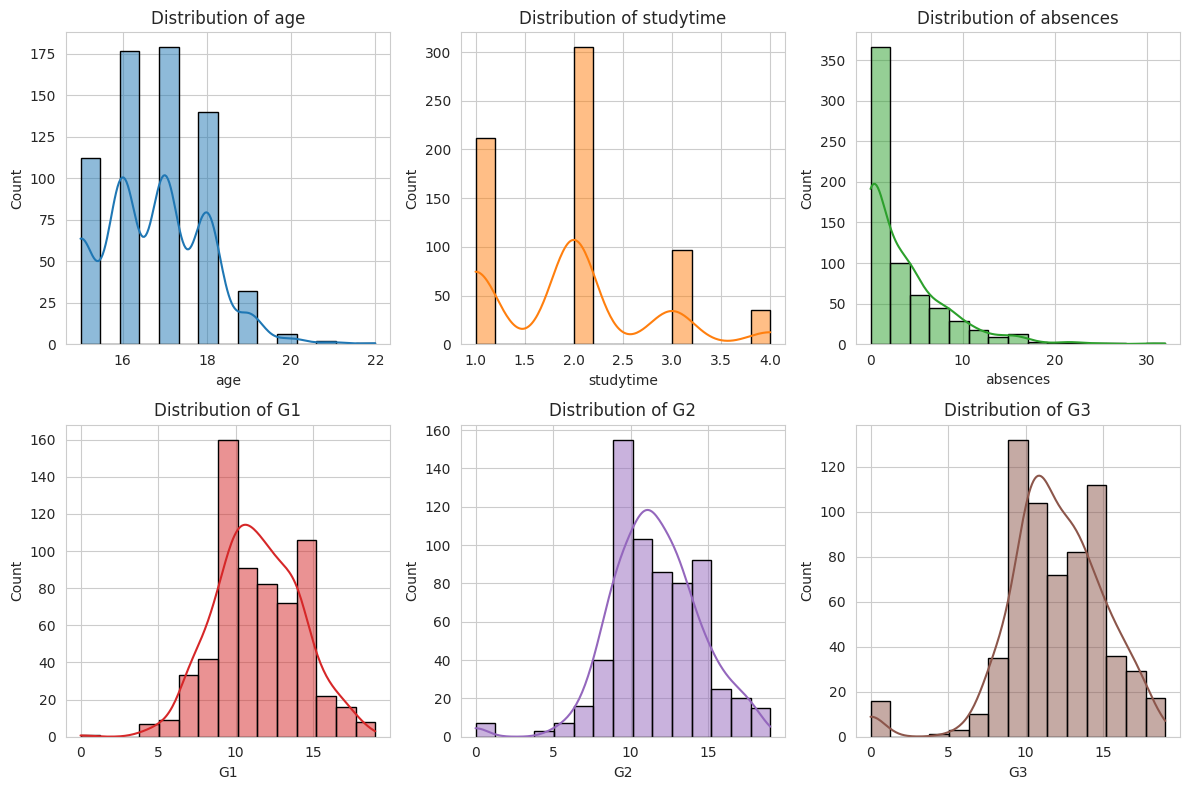

In [17]:
# Separate plots for key numeric features
features = ['age', 'studytime', 'absences', 'G1', 'G2', col]

# 6) Histograms
plt.figure(figsize=(12, 8))
for i, f in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[f], kde=True, bins=15, color=f'C{i}', edgecolor='k')
    plt.title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

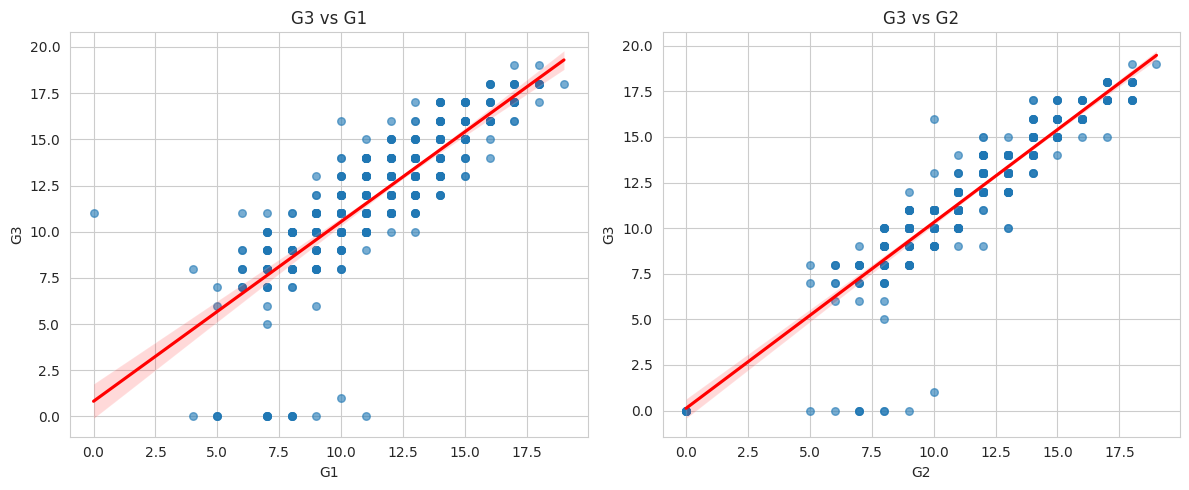

In [18]:
# 7) Scatter + regression: G3 vs G1 and G2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.regplot(x='G1', y=col, data=data, scatter_kws={'s': 30, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('G3 vs G1')
plt.subplot(1, 2, 2)
sns.regplot(x='G2', y=col, data=data, scatter_kws={'s': 30, 'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('G3 vs G2')
plt.tight_layout()
plt.show()


Feature Selection

In [21]:
# Define the feature columns (X) and target column (y)
X = data_encoded.drop('G3', axis=1)
y = data_encoded['G3']

# Checking the shape of features and target
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Shape of X: (649, 32)
Shape of y: (649,)
Training set shape: (454, 32)
Testing set shape: (195, 32)


Model building and training

In [22]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Training and evaluating each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

# Creating a results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score"])

# Display results
print("Model Performance Comparison:\n")
print(results_df)

Model Performance Comparison:

               Model       MAE      RMSE  R2 Score
0  Linear Regression  0.784661  1.199421  0.869905
1   Ridge Regression  0.784062  1.198791  0.870042
2   Lasso Regression  0.772095  1.180872  0.873898
3      Random Forest  0.814103  1.259953  0.856442


Feature importance

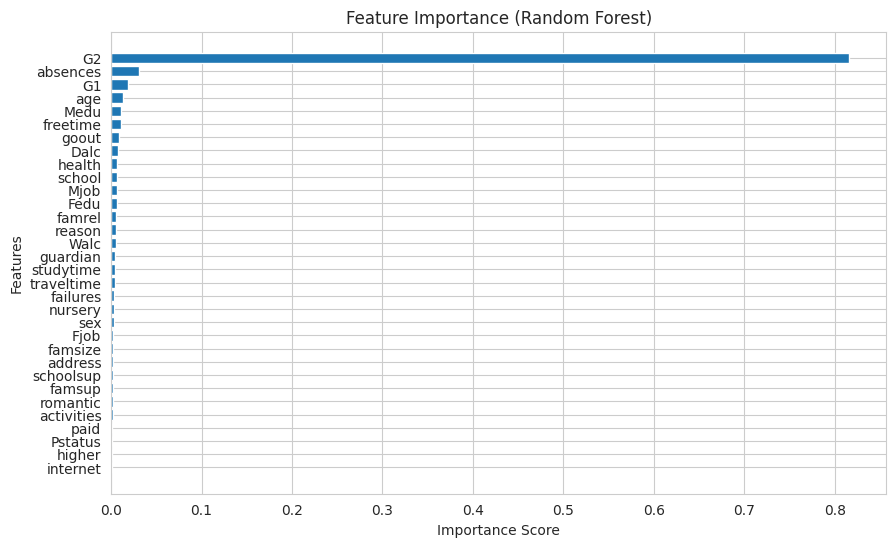

In [23]:
# Feature importance for Random Forest
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Model comparison visualizaion

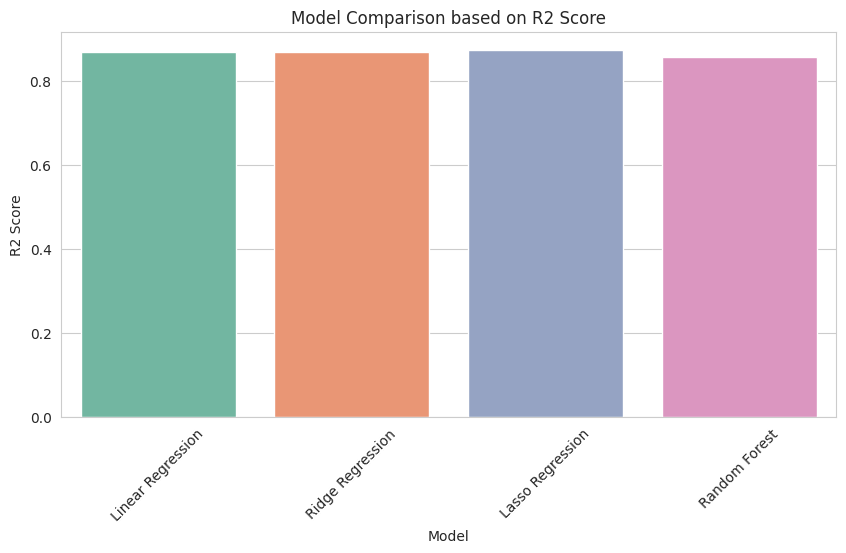

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette
colors = sns.color_palette("Set2")

# R2 Score comparison
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model', y='R2 Score', palette=colors)
plt.title('Model Comparison based on R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

saving the best model

In [25]:
import joblib

# Assuming Lasso Regression is the best model
best_model = models["Lasso Regression"]

# Save the model
joblib.dump(best_model, 'best_student_performance_model.pkl')

# Load the saved model
loaded_model = joblib.load('best_student_performance_model.pkl')

# Example prediction using an existing test sample
sample = X_test.iloc[0:1]
prediction = loaded_model.predict(sample)
print("Predicted Final Grade (G3) for X_test.iloc[0]:", prediction)

Predicted Final Grade (G3) for X_test.iloc[0]: [18.26254732]
